# Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

#### Hypothesis Generating 
The product sales from a particular store will depend on the quality of the 
product, and also the popularity of the store in that area, so we will take 
care of these.

In [8]:
###Introducing dependencies
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
##Loading the dataset
data = pd.read_csv("Train.csv")
data_test = pd.read_csv("Test.csv")

In [10]:
####taking a look at first five rows of the dataset
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [11]:
data_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
data_test.shape

(5681, 11)

In [13]:
data.shape

(8523, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
data['Item_Weight'] = data['Item_Weight'].replace(to_replace ='NaN', value = np.nan)
data['Item_Weight'] = data['Item_Weight'].astype(float)

In [16]:
data['Outlet_Size'] = data['Outlet_Size'].replace(to_replace = 'NaN', value= np.nan)


In [17]:
data.replace(to_replace = 'NaN', value = np.nan, inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

In [20]:
# checking for the missing values in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
##Replacing the Null values by the median values
median1 = data['Item_Weight'].median()

data['Item_Weight'].replace(np.nan, median1, inplace = True)

In [22]:
##Replacing Null values in Catogorical columns using mode
mode1 = data['Outlet_Size'].mode().values[0]

data['Outlet_Size']= data['Outlet_Size'].replace(np.nan, mode1)

In [23]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Handling outlier in the dataset

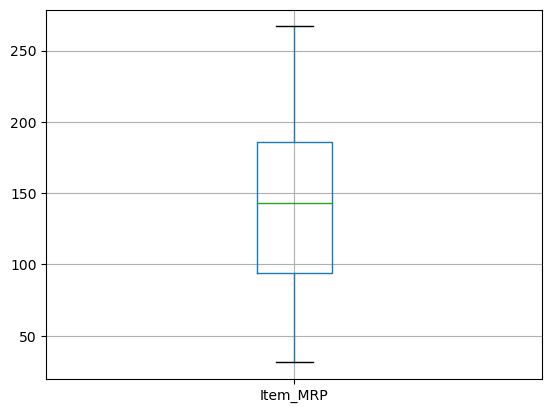

In [24]:
data.boxplot(column = ['Item_MRP'])
plt.show()

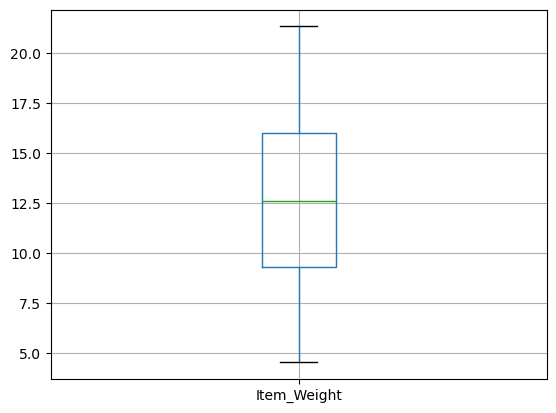

In [25]:
data.boxplot(column = ['Item_Weight'])
plt.show()

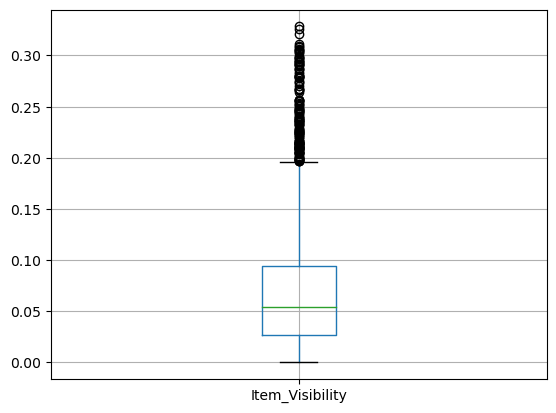

In [26]:
data.boxplot(column = ['Item_Visibility'])
plt.show()

In [27]:
##Droping outlier values
#def remove_outlier(col):
#create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [28]:
lowvisibility, uppvisibility = remove_outlier(data['Item_Visibility'])
data['Item_Visibility'] = np.where(data['Item_Visibility'] > uppvisibility, uppvisibility,data['Item_Visibility'])
data['Item_Visibility'] = np.where(data['Item_Visibility'] < lowvisibility, lowvisibility,data['Item_Visibility'])

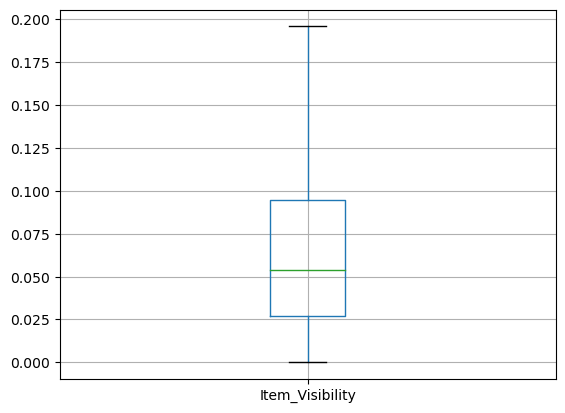

In [29]:
###boxplot after removing outliers
data.boxplot(column= ['Item_Visibility'])
plt.show()

###  Bivariate Analysis

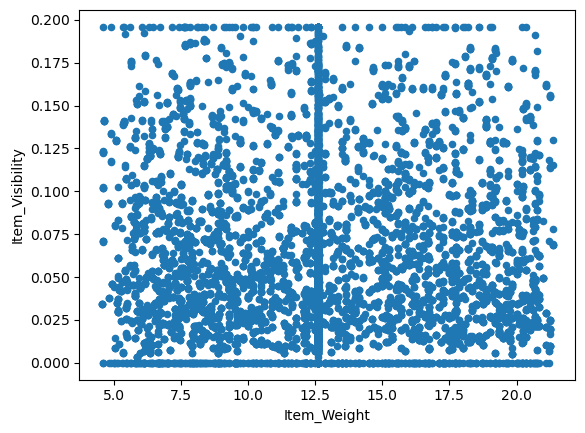

In [30]:
##Scatterplot
data.plot.scatter(x='Item_Weight', y = 'Item_Visibility')
plt.show()

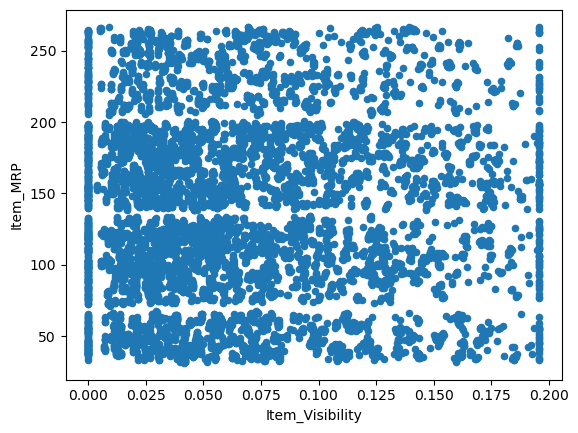

In [31]:
##scatterplot between visibility and MRP of the product
data.plot.scatter(x="Item_Visibility", y = "Item_MRP")
plt.show()

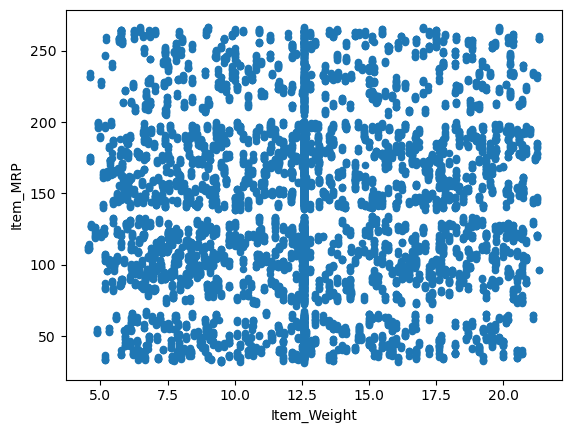

In [32]:
data.plot.scatter(x = "Item_Weight", y ="Item_MRP")
plt.show()

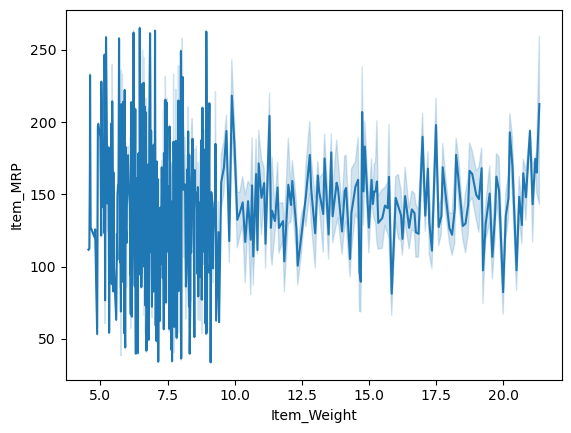

In [33]:
sns.lineplot(x ='Item_Weight', y = 'Item_MRP', data= data)
plt.show()

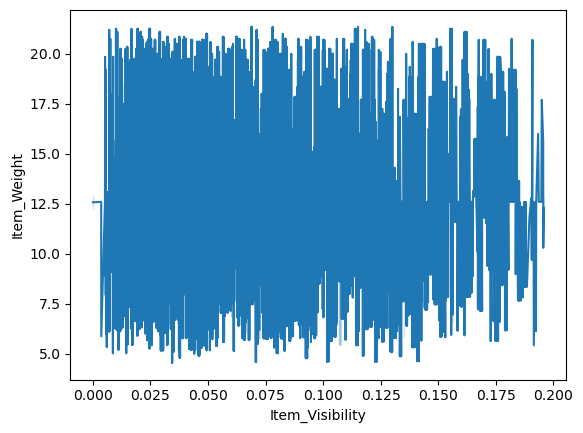

In [34]:
sns.lineplot(x= 'Item_Visibility', y ='Item_Weight', data = data)
plt.show()

# Heatmap

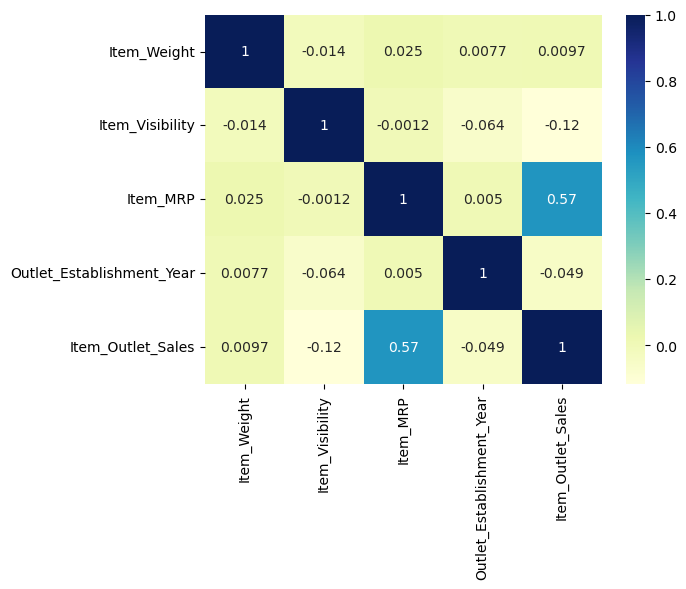

In [35]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

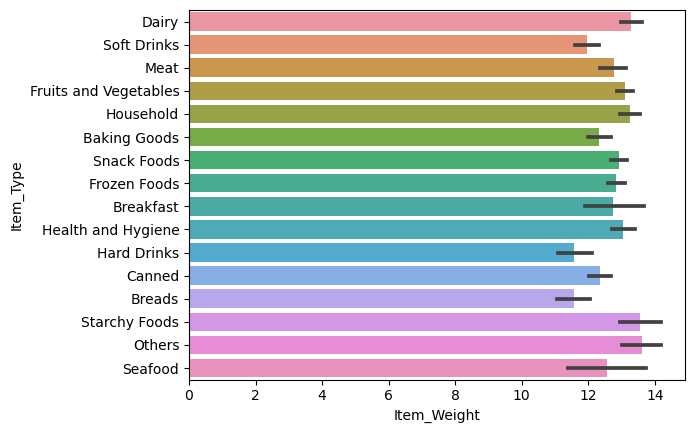

In [36]:
###Catagorical v/s Numerical plot
sns.barplot(x= 'Item_Weight' , y = "Item_Type", data= data)
plt.show()

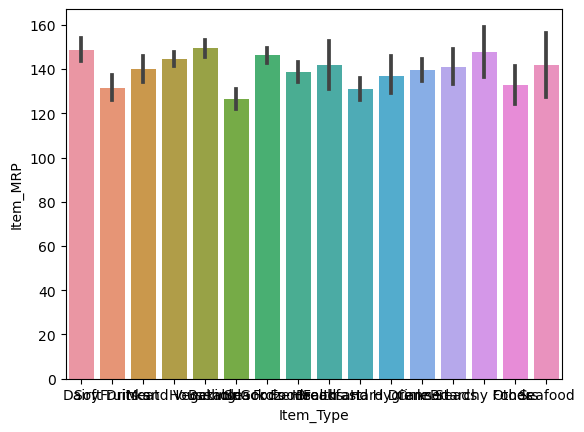

In [37]:
###BAR plot
sns.barplot(x= 'Item_Type' , y = "Item_MRP", data= data)
plt.show()

# Feature engineering

In [38]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
##Dropping the categorical column as models only works on numerical data 
data_fnl = data.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1)
data_fnl


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [40]:
##Checking the null values 
data_fnl.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [41]:
##Now we will proceed to split the data into train data and test data
import numpy as np
from sklearn.model_selection import train_test_split


In [42]:
import seaborn  as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [43]:
x= data_fnl.drop("Item_Outlet_Sales",axis=1)
y=data_fnl["Item_Outlet_Sales"]
print('shape of x =',x.shape)
print('shape of y =',y.shape)

shape of x = (8523, 4)
shape of y = (8523,)


In [44]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size =0.4,random_state=45)
print('shape of x_train =',x_train.shape)
print('shape of y_train =',y_train.shape)
print('shape of x_test = ',x_test.shape)
print('shape of y_test =',y_test.shape)

shape of x_train = (5113, 4)
shape of y_train = (5113,)
shape of x_test =  (3410, 4)
shape of y_test = (3410,)


### Applying the linear regression model 

In [45]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
##Checking the cofficient of regression
lr.coef_

array([-3.30198728e+00, -4.09450867e+03,  1.57290818e+01, -1.27226923e+01])

In [47]:
#checking the intercept of the linear regression
lr.intercept_

25687.025890129018

In [48]:
## predictions using the linear regression model 
lr.predict(x_test)

array([3909.06088903, 1647.00622419, 3109.24277926, ..., 1592.46722272,
       1816.07869618, 2341.78843519])

In [49]:
#the actual values of y_test
y_test

4454    3410.2276
4743    1605.9096
3017     675.1212
5753    1662.5026
1478    4211.1850
          ...    
3813     875.5270
6621    2681.8424
486      942.7728
3253    1231.7300
335     2055.9904
Name: Item_Outlet_Sales, Length: 3410, dtype: float64

In [50]:
#Checking the accuracy of linear regression model
lr.score(x_test,y_test)

0.3349746827615053

In [51]:
#  now we will try to apply ridge regression model on the dataset
from sklearn.linear_model import Ridge
rd = Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.3347167423693719

In [52]:
##Accuracy from the ridge regression model 
rd2 = Ridge(alpha= 2)
rd2.fit(x_train,y_train)
rd2.score(x_test,y_test)

0.33436794127301894

In [53]:
##So our linear regression model is more accurate


## saving the model 


In [54]:
import pickle

In [55]:
with open('lr_pickle', 'wb') as miniproject:
    pickle.dump(lr,miniproject)